# HOA SEN GROUP 


In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('HSG Historical Data.csv')
df1=df.reset_index()['Price']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1252 non-null   object 
 1   Price       1252 non-null   float64
 2   Open        1252 non-null   float64
 3   High        1252 non-null   float64
 4   Low         1252 non-null   float64
 5   Vol.        1252 non-null   object 
 6   Change %    1252 non-null   int64  
 7   Unnamed: 7  1252 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 78.4+ KB


In [4]:
df1.head()

0    23.05
1    22.75
2    22.90
3    22.85
4    22.45
Name: Price, dtype: float64

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [10]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\hangt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0645
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0070
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0023
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0018
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0015
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0014
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0014
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0012
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0012
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0012
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0011
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0011
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 9.7408e-04
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 9.62

In [12]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [13]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [14]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [15]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 0.21795627154414612


In [16]:
# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing MAE: 0.16619727138185156


In [17]:
# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing MAPE: 0.029896104359208704


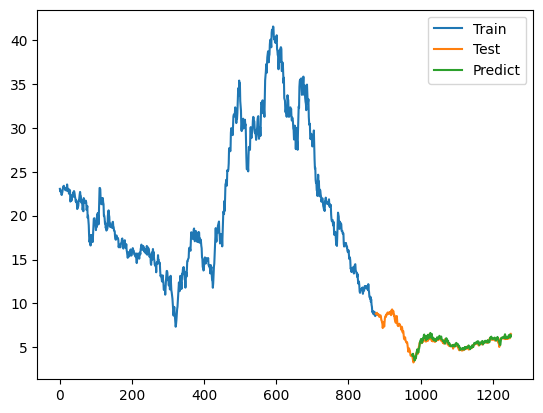

In [18]:
# 14.Vẽ hình
# Train
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
# Test
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
# Dự đoán trên tập test
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

# Dự đoán 30 ngày tiếp theo

In [19]:

# 13. Predict the next 30 days
x_input = test_data[-100:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

[0.08793036]
101
1 day input [0.05541035 0.05567172 0.05567172 0.05854679 0.05802405 0.05776268
 0.05828542 0.05541035 0.05201255 0.05044433 0.05279665 0.05488761
 0.05541035 0.05697857 0.05567172 0.05619446 0.05880815 0.05959226
 0.0541035  0.05331939 0.05593309 0.05723994 0.05959226 0.060115
 0.05985363 0.05906952 0.05959226 0.05906952 0.06168322 0.06089911
 0.06089911 0.06246733 0.06037637 0.05828542 0.05828542 0.06089911
 0.06168322 0.06168322 0.06769472 0.07030842 0.07239937 0.07344485
 0.07083116 0.06821746 0.06900157 0.06821746 0.06769472 0.06795609
 0.06743335 0.06900157 0.07030842 0.07083116 0.06900157 0.06717198
 0.06508102 0.06743335 0.06795609 0.06795609 0.07187663 0.07187663
 0.06508102 0.06429692 0.06508102 0.05959226 0.05959226 0.05541035
 0.04626242 0.05227392 0.06246733 0.07083116 0.07004705 0.06952431
 0.07135389 0.07161526 0.07344485 0.07292211 0.07344485 0.07109252
 0.07161526 0.07553581 0.07736539 0.07266074 0.06952431 0.07030842
 0.0747517  0.07187663 0.07109252 0

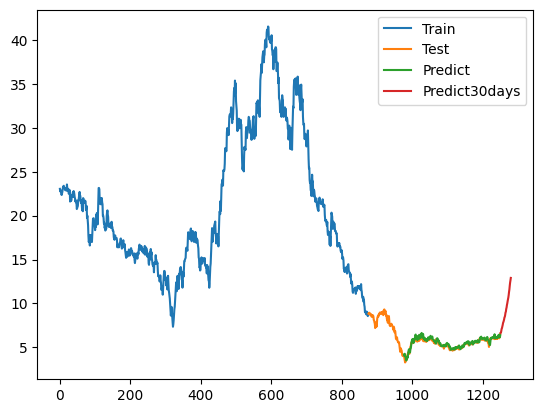

In [20]:

# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

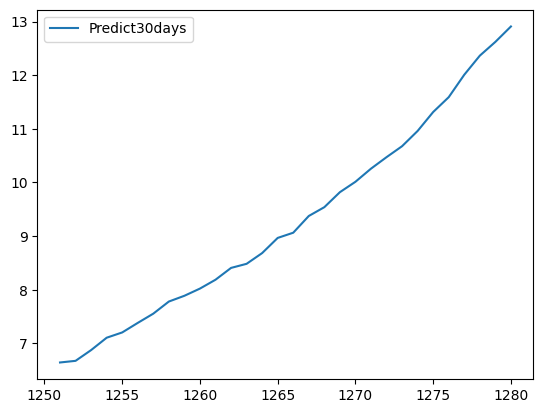

In [21]:
# 14.Vẽ hình
# Dự đoán 30 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Predict30days'])
plt.show()

In [22]:
print(scaler.inverse_transform(lst_output))

[[ 6.64421553]
 [ 6.67483061]
 [ 6.87519217]
 [ 7.10576374]
 [ 7.20420837]
 [ 7.38213692]
 [ 7.55463622]
 [ 7.78032274]
 [ 7.8877892 ]
 [ 8.02198624]
 [ 8.1869101 ]
 [ 8.40726943]
 [ 8.48366929]
 [ 8.68383388]
 [ 8.96635036]
 [ 9.06349911]
 [ 9.3754987 ]
 [ 9.53968369]
 [ 9.81915346]
 [10.01307468]
 [10.25768057]
 [10.4720508 ]
 [10.67654943]
 [10.96094446]
 [11.31390706]
 [11.59063342]
 [12.00895781]
 [12.36454581]
 [12.6213089 ]
 [12.9084348 ]]
